# Part 1: Pre-processing

First, we load our modules and data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('CS_Purchase_data.csv', index_col=0)
print(dataset.head())

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN   

dataset.head()

In [2]:
dataset.isnull().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2            15721
Product_Category_3            34817
Purchase                          0
dtype: int64

Take a good look at the different variables we have. There are two IDs: one for the users, one for the products. Those two entities each have properties, i.e. users have an age, occupation, annual income etc., and products have categories. Furthermore, for each transaction the purchase amount is given (variable 'Purchase').

## Merge datasets

Given that the exercise requires us to predict the purchase amount of a particular customer, the dataset needs to be transformed accordingly. In this part, you will aggregate the purchase data per user and remove the columns we no longer need.

### Remove unnecessary columns

Create a function to remove the unnecessary columns:

First, list the ones (i.e. copy their exact column name) you think should be removed:

In [3]:
def fill_in_columns():
    to_remove = ['Product_Category_1','Product_Category_2', 'Product_Category_3', 'Product_ID']
    
    ###
    ### YOUR CODE HERE
    purchase_data = dataset.drop(to_remove, axis=1)
    ###

    return to_remove

In [4]:
fill_in_columns()

['Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Product_ID']

Your answer will be verified below (no need for you to do anything).

In [5]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Now remove them:

In [6]:
def remove_columns(dataset, to_remove):
    purchase_data = dataset.copy()
    
    ###
    ### YOUR CODE HERE
    purchase_data = dataset.drop(to_remove, axis=1)
    ###
    
    return purchase_data

In [7]:
purchase_data = remove_columns(dataset, fill_in_columns())
purchase_data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,F,0-17,10,A,2,0,8370
1,1000001,F,0-17,10,A,2,0,15200
2,1000001,F,0-17,10,A,2,0,1422
3,1000001,F,0-17,10,A,2,0,1057
4,1000002,M,55+,16,C,4+,0,7969


Your answer will be verified below (no need for you to do anything).

In [8]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Aggregate the observations

Now, aggregate the observations based on the user ID and make a new column 'Purchase_Sum' which contains the sum of all purchases of a particular user:

In [9]:
def aggregate_observations(dataset):
    purchase_data = dataset.copy()
    
    ###
    ### YOUR CODE HERE
    purchase_data = purchase_data.groupby( ['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']).sum()
    purchase_data = purchase_data.add_suffix('_Sum').reset_index()
    #purchase_data['Purchase_Sum'] = purchase_data['Purchase']
    #purchase_data = dataset.drop(['Purchase'], axis=1)
    ###
    
    return purchase_data

In [10]:
purchase_data = aggregate_observations(purchase_data)
#purchase_data = purchase_data.drop(['Purchase'], axis=1)
purchase_data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_Sum
0,1000001,F,0-17,10,A,2,0,38891
1,1000002,M,55+,16,C,4+,0,37417
2,1000003,M,26-35,15,A,3,0,49947
3,1000004,M,46-50,7,B,2,1,66607
4,1000005,M,26-35,20,A,1,1,50684


Your answer will be verified below (no need for you to do anything).

In [11]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Merge the datasets

Now, we add the extra customer data:

In [12]:
customer_data = pd.read_csv('CS_Customer_data.csv')
print(customer_data.head())

   User_ID  annual_income  number_of_children  proximity_town    sum
0  1000001    42521.93013                   2        2.677101  38891
1  1000002    59199.36954                   0        3.589760  37417
2  1000003    40056.02938                   1        3.944390  49947
3  1000004    79474.66782                   0        2.702605  66607
4  1000005    85567.55715                   1        2.841509  50684


Write a function that merges the two datasets:

In [13]:
def merge_datasets(purchase_data, customer_data):
    final_data = purchase_data.copy()
    
    ###
    ### YOUR CODE HERE
    final_data = pd.merge(final_data, customer_data, on='User_ID', how='left')
    ###
    
    return final_data

In [14]:
final_data = merge_datasets(purchase_data, customer_data)
final_data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_Sum,annual_income,number_of_children,proximity_town,sum
0,1000001,F,0-17,10,A,2,0,38891,42521.93013,2,2.677101,38891
1,1000002,M,55+,16,C,4+,0,37417,59199.36954,0,3.589760,37417
2,1000003,M,26-35,15,A,3,0,49947,40056.02938,1,3.944390,49947
3,1000004,M,46-50,7,B,2,1,66607,79474.66782,0,2.702605,66607
4,1000005,M,26-35,20,A,1,1,50684,85567.55715,1,2.841509,50684


Your answer will be verified below (no need for you to do anything).

In [15]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Let's have a look at the variables:

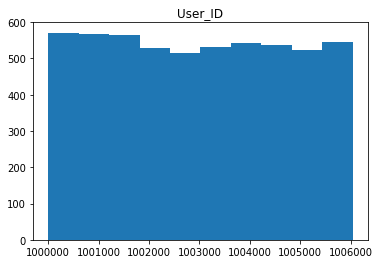

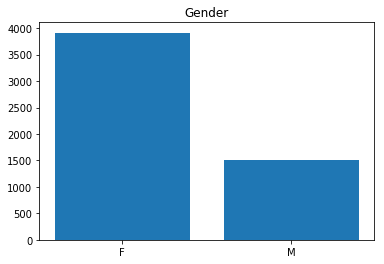

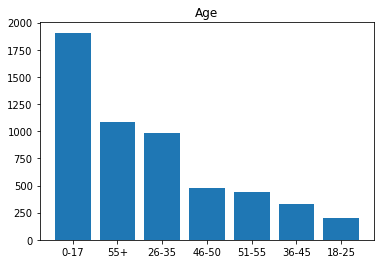

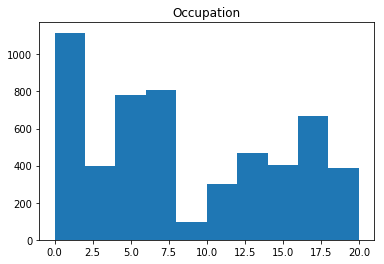

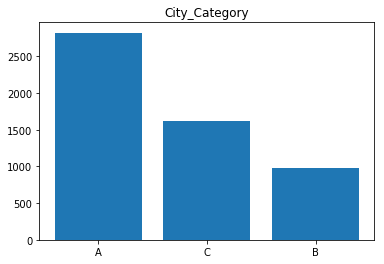

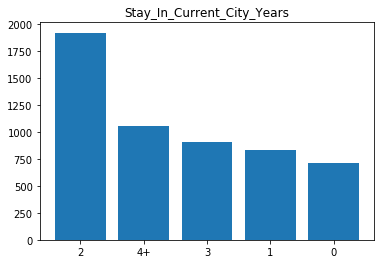

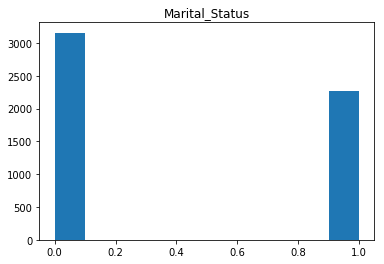

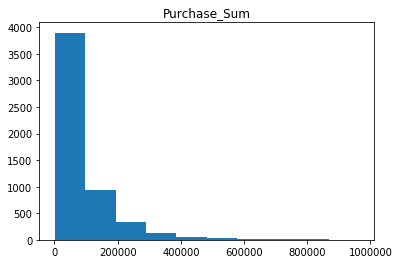

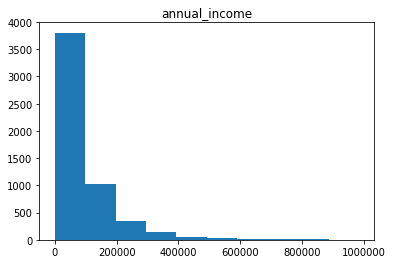

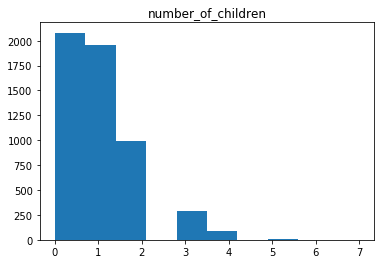

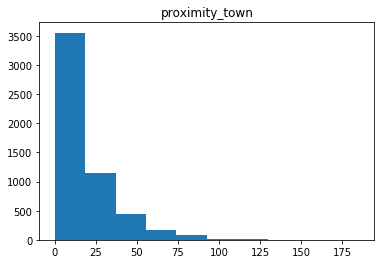

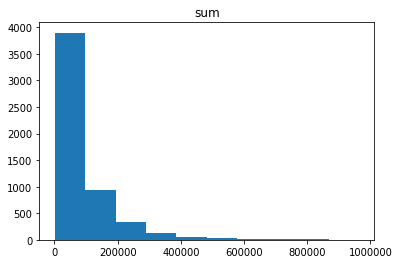

In [16]:
for var in final_data.columns:
    if var in final_data.select_dtypes(include=['float64', 'float32', 'int64', 'int32']):
        plt.hist(final_data[var].fillna(0))
    else:
        plt.bar(x = final_data[var].unique(), height = final_data[var].value_counts())
    plt.title(var)
    plt.show()

## Transform variables

The following problems could be spotted:
- User_ID : is ID, not needed anymore
- Marital status: should not be numeric
- Occupation: should not be numeric

However, we are going to do linear regression. Hence, we want to transform the categorical attributes into numeric ones, including:
- Gender
- Age
- City category
- Stay in current city years

Fix the ID:

In [17]:
fixed_id_data = final_data.drop(['User_ID'], axis=1)
fixed_id_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_Sum,annual_income,number_of_children,proximity_town,sum
0,F,0-17,10,A,2,0,38891,42521.93013,2,2.677101,38891
1,M,55+,16,C,4+,0,37417,59199.36954,0,3.589760,37417
2,M,26-35,15,A,3,0,49947,40056.02938,1,3.944390,49947
3,M,46-50,7,B,2,1,66607,79474.66782,0,2.702605,66607
4,M,26-35,20,A,1,1,50684,85567.55715,1,2.841509,50684


Now, write a function to fix the categorical variables using dummy encoding. The new variables should contain the variable name as prefix (see below):

In [18]:
def transform_categorical_variables(fixed_id_data, to_transform):
    transformed_data = fixed_id_data.copy()
    
    ###
    ### YOUR CODE HERE
    for var in to_transform:
        transformed_data = pd.concat([transformed_data.drop(var, axis=1), pd.get_dummies(transformed_data[var].values, prefix=var, drop_first=True)], axis=1)
    ###
    
    return transformed_data

In [19]:
to_transform = ['Age', 'Gender', 'City_Category', 'Stay_In_Current_City_Years']

transformed_data = transform_categorical_variables(fixed_id_data, to_transform)
transformed_data.head()

,Occupation,Marital_Status,Purchase_Sum,annual_income,number_of_children,proximity_town,sum,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_M,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,38891,42521.93013,2,2.677101,38891,0,0,0,0,0,0,0,0,0,0,1,0,0
1,16,0,37417,59199.36954,0,3.589760,37417,0,0,0,0,0,1,1,0,1,0,0,0,1
2,15,0,49947,40056.02938,1,3.944390,49947,0,1,0,0,0,0,1,0,0,0,0,1,0
3,7,1,66607,79474.66782,0,2.702605,66607,0,0,0,1,0,0,1,1,0,0,1,0,0
4,20,1,50684,85567.55715,1,2.841509,50684,0,1,0,0,0,0,1,0,0,1,0,0,0


Your answer will be verified below (no need for you to do anything).

In [20]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


That concludes Part 1: Pre-processing. You can save your progress for the next stage in our process, Part 2: Transformation:

In [21]:
transformed_data.to_csv('CS_pre_processed_data.csv')